<a href="https://colab.research.google.com/github/nt189/Extraccion-de-Caracteristicas/blob/main/Actividad%205/Actividad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
# !pip install funpymodeling

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import funpymodeling.exploratory as fp
#import funpymodeling.exploratory import freq_tbl
#import funpymodeling.exploratory as freq_tbl

In [175]:
def categorizacion(columna ,n):
  # Obtenemos el limite superior y el límite inferior de la columna objetivo
  Max = df[columna].max()
  Min = df[columna].min()
  Limites = [Min, Max]

  # calculamos el rango r
  R = Max - Min

  # calculamos el número de intervalos de clase "ni", aplocando la regla de Sturges
  ni = 1+3.32*np.log10(n)

  # calculamos el ancho del intervalo "i"
  i = R/ni

  # creacion de categorias apartir de clases
  # categorizacion de variables
  intervalos = np.linspace(Min, Max, round(ni) + 1)

  # creamos las categorias
  categorias = []

  for i in range(round(ni)):
    categorias.append('Categoria ' + str(i + 1))

  # finalmente creamos las categorias en la columna numerica
  df[columna] = pd.cut(df[columna], bins=intervalos, labels=categorias, right=False)



print('Categorizacion de variables')

Categorizacion de variables


In [176]:
def categorizada(columna):
  info = []

  table1 = fp.freq_tbl(df[columna])
  print(table1)
  info.append(table1)

  table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
  print(table2)
  info.append(table2)

  Filtro = table2[table2['frequency'] > 1]
  print(Filtro)
  info.append(Filtro)

  Filtro_index = Filtro.set_index(columna)
  info.append(Filtro_index)

  return info



In [177]:
df = pd.read_csv('listings_mexico_clean.csv')

In [178]:
# df.info()

In [179]:
# df.describe()

In [180]:
# df.columns

In [181]:
# df.head()

In [182]:
# Obtengo un analisis univariado de las variables categoricas
fp.freq_tbl(df)

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                        Perfecto Loft en gran ubicación         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                                       Magenta by Kukun         21   
...                                                  ...        ...   
25165      Astonishing view@Condesa best nbh perfect apt          1   
25166  Private suite in Condesa Great internet & loca...          1   
25167          Artsy habitación frente al Parque México!          1   
25168  LOFT 14 (Parque Delta, Hosp. siglo XXI, Foro Sol)          1   
25169                   Pretty, well centered, amenities          1   

       percentage  cumulative_perc  
0        0.002144         0.002144  
1        0.001843         0.003988  
2        0.001806         0.005793  

                host_location  frequency  percentage  cumulative_perc
0         Mexico City, Mexico      17198    0.646979         0.646979
1                      Mexico       6390    0.240388         0.887367
2    Ciudad de México, Mexico        383    0.014408         0.901776
3    Federal District, Mexico        213    0.008013         0.909789
4                New York, NY        203    0.007637         0.917425
..                        ...        ...         ...              ...
395        Merion Station, PA          1    0.000038         0.999850
396            Colima, Mexico          1    0.000038         0.999887
397                 Singapore          1    0.000038         0.999925
398          Mahahual, Mexico          1    0.000038         0.999962
399       Copenhagen, Denmark          1    0.000038         1.000000

[400 rows x 4 columns]
                host_location  frequency
0         Mexico City, Mexico      17198
1                      Mexico       6390
2    Ciudad d

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

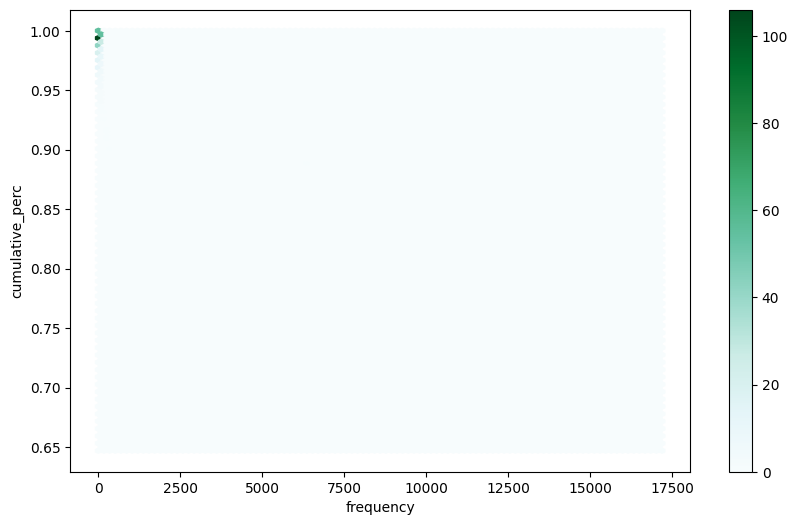

In [183]:
categorizada('host_location')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      21674    0.815364         0.815364
1  within a few hours       2310    0.086901         0.902265
2  a few days or more       1304    0.049056         0.951320
3        within a day       1294    0.048680         1.000000
   host_response_time  frequency
0      within an hour      21674
1  within a few hours       2310
2  a few days or more       1304
3        within a day       1294
   host_response_time  frequency
0      within an hour      21674
1  within a few hours       2310
2  a few days or more       1304
3        within a day       1294


<Axes: ylabel='frequency'>

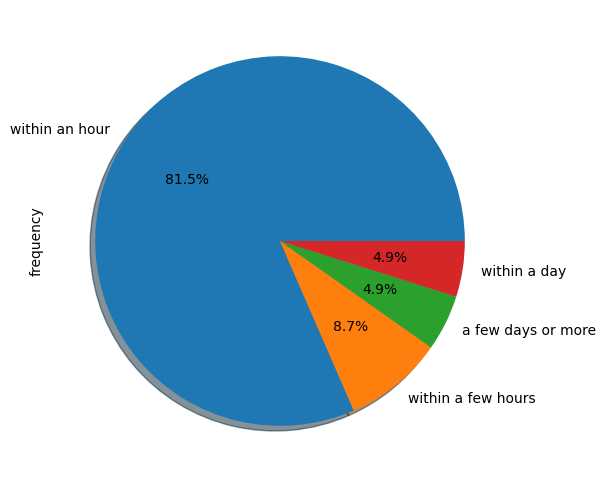

In [184]:
categorizada('host_response_time')[3]['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

  host_is_superhost  frequency  percentage  cumulative_perc
0                 f      16855    0.634076         0.634076
1                 t       9727    0.365924         1.000000
  host_is_superhost  frequency
0                 f      16855
1                 t       9727
  host_is_superhost  frequency
0                 f      16855
1                 t       9727


<Axes: xlabel='host_is_superhost'>

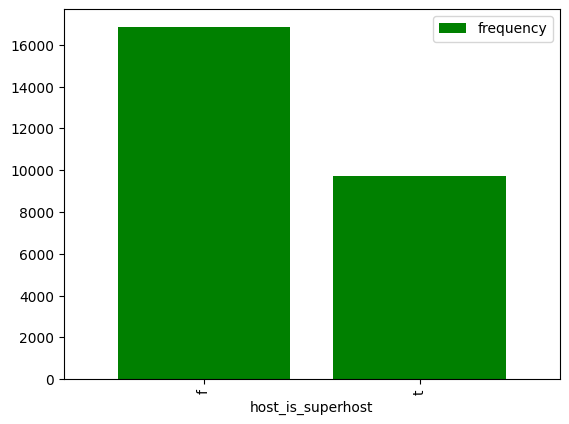

In [185]:
categorizada('host_is_superhost')[3].plot(kind='bar', width=0.8, color='green')

             host_neighbourhood  frequency  percentage  cumulative_perc
0               Sin especificar      12915    0.485855         0.485855
1                       Polanco       1817    0.068355         0.554210
2                    Roma Norte       1080    0.040629         0.594839
3           Chapultepec Morales        580    0.021819         0.616658
4                       Condesa        576    0.021669         0.638327
..                          ...        ...         ...              ...
783       Torres de Chimalistac          1    0.000038         0.999850
784            Colonia Narvarte          1    0.000038         0.999887
785  Fraccionamiento aldea Zama          1    0.000038         0.999925
786          Limites de Polanco          1    0.000038         0.999962
787                    Céntrico          1    0.000038         1.000000

[788 rows x 4 columns]
             host_neighbourhood  frequency
0               Sin especificar      12915
1                       Po

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

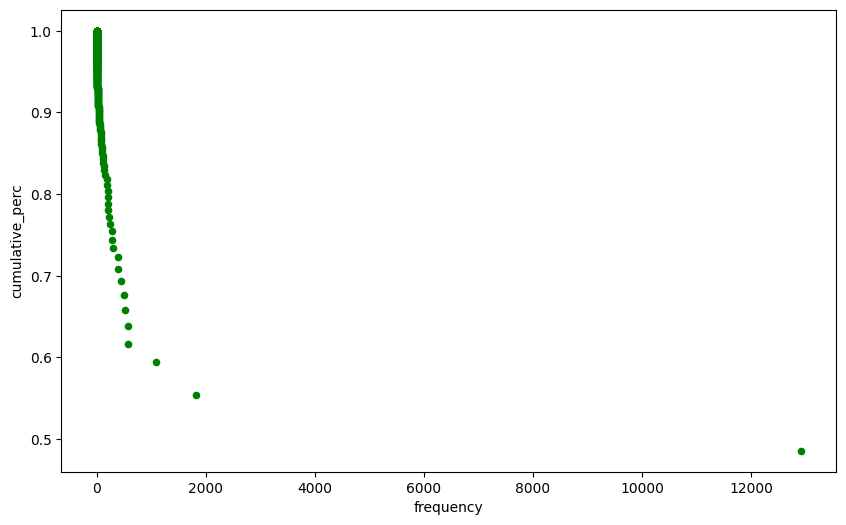

In [186]:
categorizada('host_neighbourhood')[0].plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

                 host_verifications  frequency  percentage  cumulative_perc
0                ['email', 'phone']      20504    0.771349         0.771349
1  ['email', 'phone', 'work_email']       3381    0.127191         0.898540
2                         ['phone']       2527    0.095064         0.993605
3           ['phone', 'work_email']        105    0.003950         0.997555
4                         ['email']         33    0.001241         0.998796
5                                []         30    0.001129         0.999925
6           ['email', 'work_email']          1    0.000038         0.999962
7                    ['work_email']          1    0.000038         1.000000
                 host_verifications  frequency
0                ['email', 'phone']      20504
1  ['email', 'phone', 'work_email']       3381
2                         ['phone']       2527
3           ['phone', 'work_email']        105
4                         ['email']         33
5                                [

<Axes: xlabel='host_verifications'>

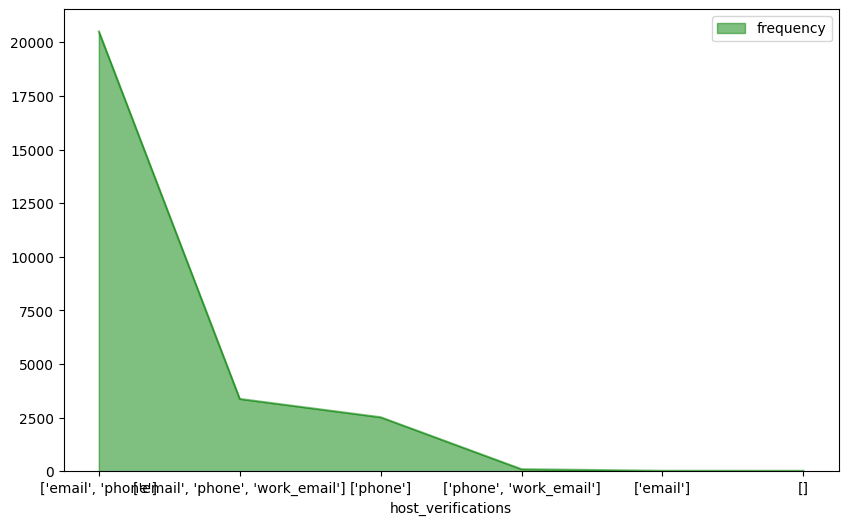

In [187]:
categorizada('host_verifications')[3].plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

  host_identity_verified  frequency  percentage  cumulative_perc
0                      t      25426    0.956512         0.956512
1                      f       1156    0.043488         1.000000
  host_identity_verified  frequency
0                      t      25426
1                      f       1156
  host_identity_verified  frequency
0                      t      25426
1                      f       1156


<Axes: xlabel='host_identity_verified'>

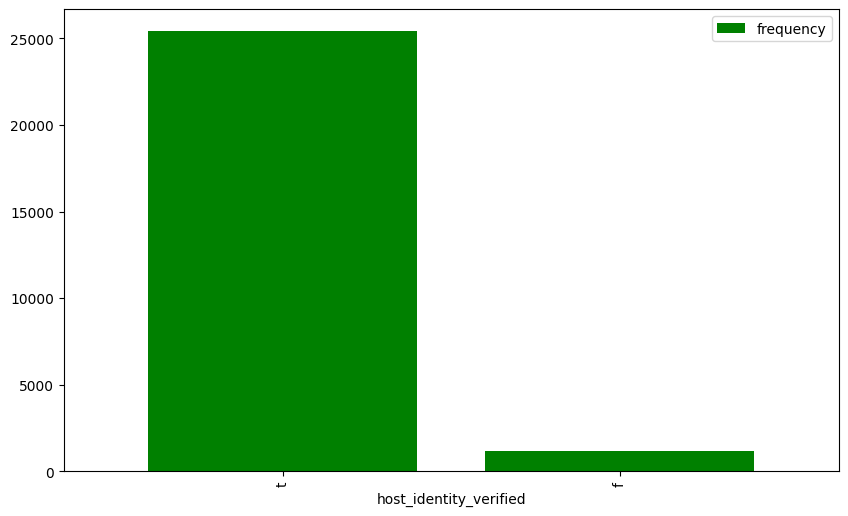

In [188]:
categorizada('host_identity_verified')[3].plot(kind='bar', width=0.8, color='green', figsize=(10,6))

                                         neighbourhood  frequency  percentage  \
0                Mexico City, Ciudad de México, Mexico      13066    0.491536   
1                                      Sin descripción      10895    0.409864   
2                            Mexico City, CDMX, Mexico        584    0.021970   
3                Mexico City, Distrito Federal, Mexico        463    0.017418   
4                     Centro, Ciudad de México, Mexico        227    0.008540   
..                                                 ...        ...         ...   
339                       Colonia Juárez, CDMX, Mexico          1    0.000038   
340        Mexico City, Alcaldia Benito Juarez, Mexico          1    0.000038   
341  Mexico City, Villa Coyoacan, Alcaldia Coyoacan...          1    0.000038   
342           Alvaro Obregon, Ciudad de México, Mexico          1    0.000038   
343  Centro Histórico de Ciudad de México, Ciudad d...          1    0.000038   

     cumulative_perc  
0   

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

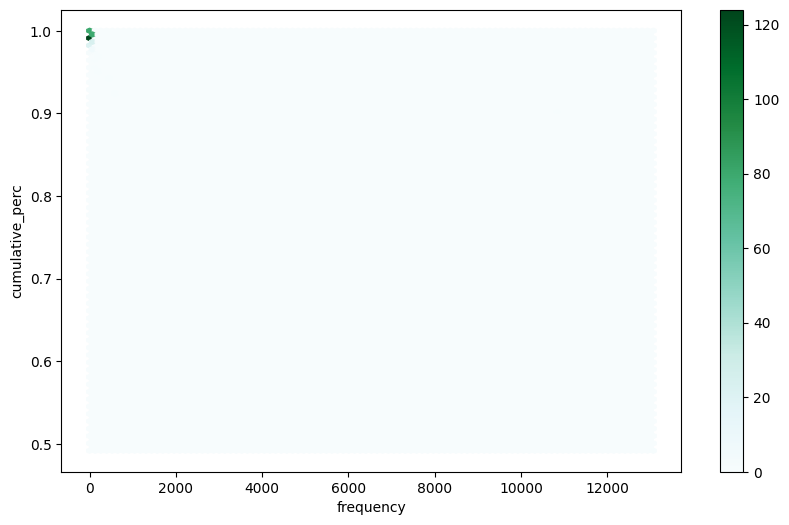

In [189]:
categorizada('neighbourhood')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

    neighbourhood_cleansed  frequency  percentage  cumulative_perc
0               Cuauhtémoc      12231    0.460123         0.460123
1           Miguel Hidalgo       4533    0.170529         0.630652
2            Benito Juárez       3152    0.118576         0.749229
3                 Coyoacán       1719    0.064668         0.813897
4           Álvaro Obregón       1075    0.040441         0.854338
5                  Tlalpan        812    0.030547         0.884885
6      Venustiano Carranza        734    0.027613         0.912497
7        Gustavo A. Madero        506    0.019035         0.931533
8    Cuajimalpa de Morelos        442    0.016628         0.948160
9                Iztacalco        399    0.015010         0.963171
10            Azcapotzalco        349    0.013129         0.976300
11              Iztapalapa        266    0.010007         0.986307
12  La Magdalena Contreras        143    0.005380         0.991686
13              Xochimilco        143    0.005380         0.99

<Axes: xlabel='neighbourhood_cleansed'>

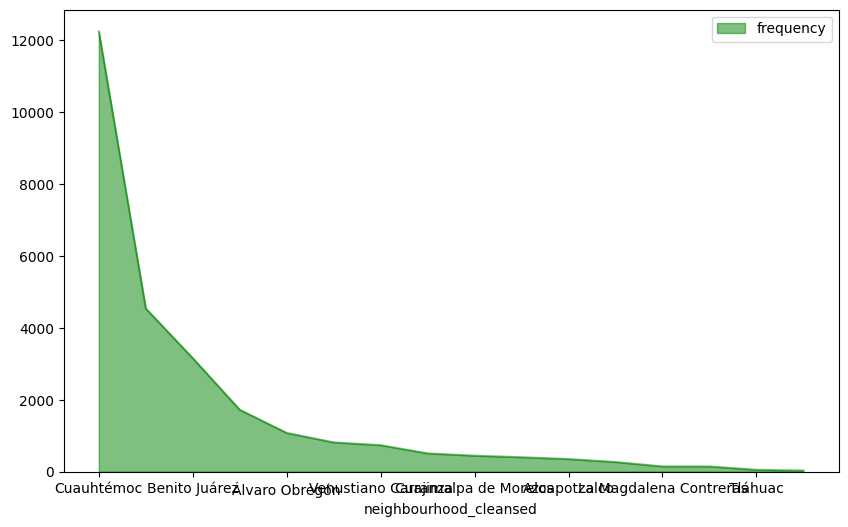

In [190]:
categorizada('neighbourhood_cleansed')[3].plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

  neighbourhood_group_cleansed  frequency  percentage  cumulative_perc
0              Sin descripción      26582         1.0              1.0
  neighbourhood_group_cleansed  frequency
0              Sin descripción      26582
  neighbourhood_group_cleansed  frequency
0              Sin descripción      26582


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

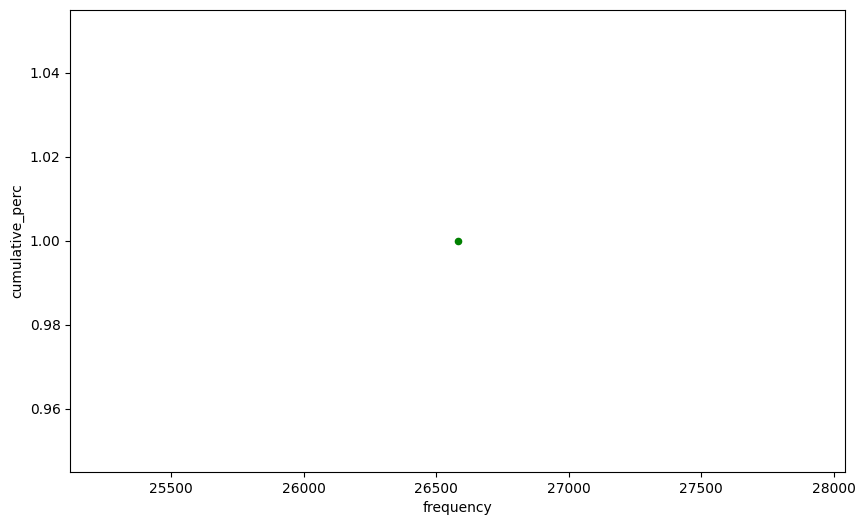

In [191]:
categorizada('neighbourhood_group_cleansed')[0].plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

                                             description  frequency  \
0                                        Sin descripción        933   
1      Enjoy the simplicity of this quiet, central home.        106   
2      This place has a strategic location - it will ...         65   
3      If you are looking for an ideal accommodation ...         59   
4      The loft is equipped to provide the utmost com...         53   
...                                                  ...        ...   
21623  Casa El Ángel has a great location! We are 1 b...          1   
21624  Enjoy your stay in this carefully designed, su...          1   
21625  Our space is located in a quiet, safe area and...          1   
21626  Style and confortable furniture all over the p...          1   
21627  Known as New Polanco, the Granada colony has p...          1   

       percentage  cumulative_perc  
0        0.035099         0.035099  
1        0.003988         0.039087  
2        0.002445         0.041532  

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

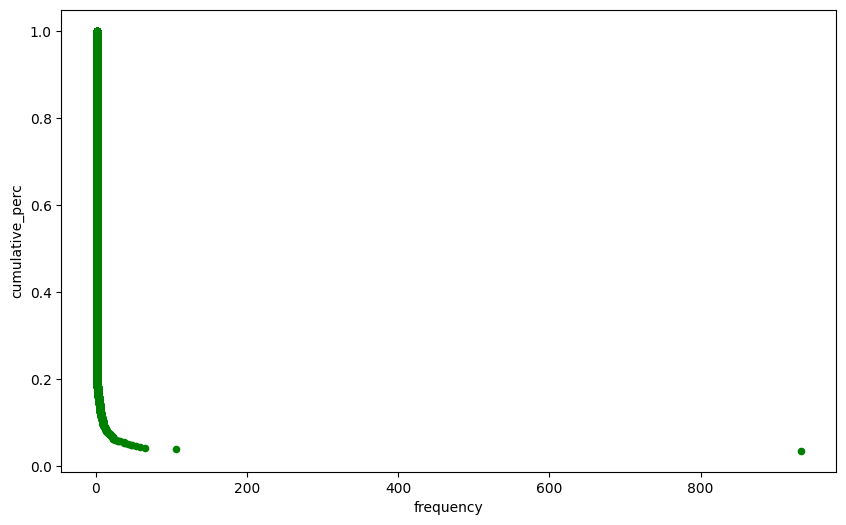

In [192]:
categorizada('description')[0].plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

  instant_bookable  frequency  percentage  cumulative_perc
0                f      16080    0.604921         0.604921
1                t      10502    0.395079         1.000000
  instant_bookable  frequency
0                f      16080
1                t      10502
  instant_bookable  frequency
0                f      16080
1                t      10502


<Axes: xlabel='instant_bookable'>

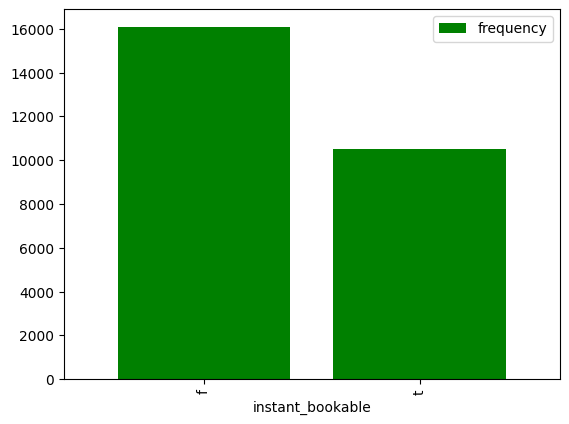

In [193]:
categorizada('instant_bookable')[3].plot(kind='bar', width=0.8, color='green')

                  property_type  frequency  percentage  cumulative_perc
0            Entire rental unit       9971    0.375103         0.375103
1                  Entire condo       3423    0.128771         0.503875
2   Private room in rental unit       3034    0.114137         0.618012
3          Private room in home       2266    0.085246         0.703258
4                   Entire loft       1515    0.056993         0.760251
..                          ...        ...         ...              ...
87        Private room in floor          1    0.000038         0.999850
88                 Earthen home          1    0.000038         0.999887
89                Entire in-law          1    0.000038         0.999925
90          Shared room in dorm          1    0.000038         0.999962
91                        Tower          1    0.000038         1.000000

[92 rows x 4 columns]
                  property_type  frequency
0            Entire rental unit       9971
1                  Entire c

<Axes: xlabel='property_type'>

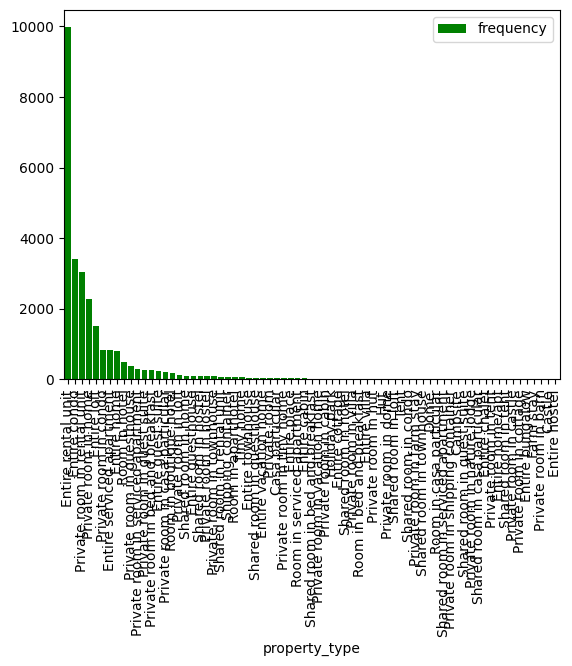

In [194]:
categorizada('property_type')[3].plot(kind='bar', width=0.8, color='green')

         room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      17363    0.653186         0.653186
1     Private room       8693    0.327026         0.980212
2      Shared room        401    0.015085         0.995298
3       Hotel room        125    0.004702         1.000000
         room_type  frequency
0  Entire home/apt      17363
1     Private room       8693
2      Shared room        401
3       Hotel room        125
         room_type  frequency
0  Entire home/apt      17363
1     Private room       8693
2      Shared room        401
3       Hotel room        125


<Axes: ylabel='frequency'>

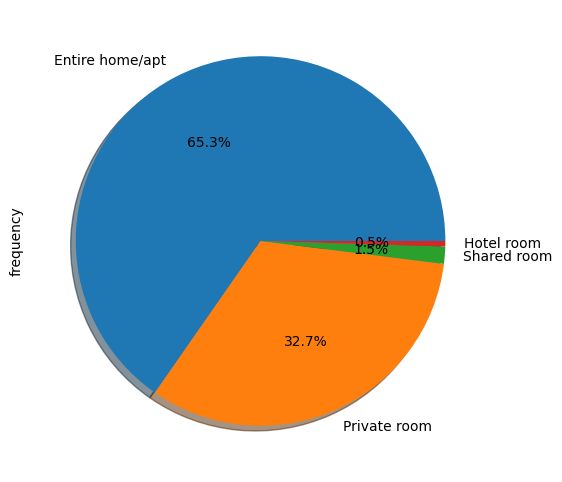

In [195]:
categorizada('room_type')[3]['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

  has_availability  frequency  percentage  cumulative_perc
0                t      25533    0.960537         0.960537
1                f       1049    0.039463         1.000000
  has_availability  frequency
0                t      25533
1                f       1049
  has_availability  frequency
0                t      25533
1                f       1049


<Axes: xlabel='has_availability'>

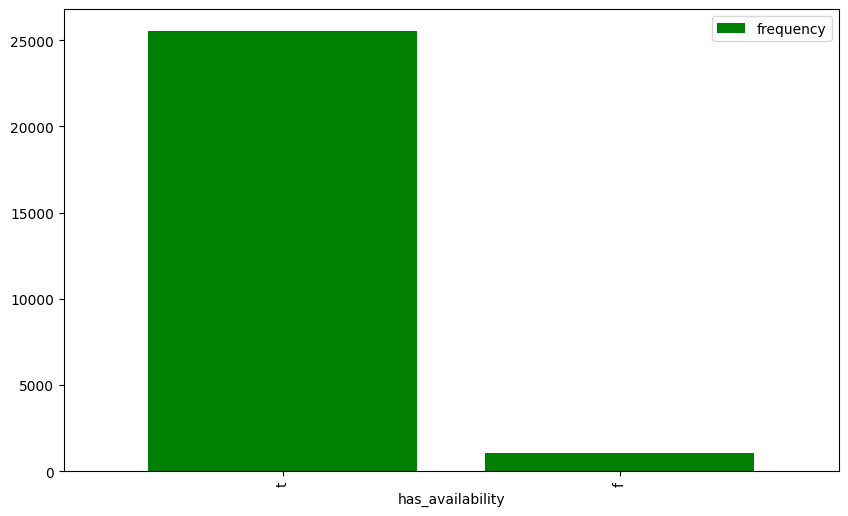

In [196]:
categorizada('has_availability')[3].plot(kind='bar', width=0.8, color='green', figsize=(10,6))

     first_review  frequency  percentage  cumulative_perc
0       Sin fecha       3656    0.137537         0.137537
1      2023-08-27        105    0.003950         0.141487
2      2022-10-31        103    0.003875         0.145362
3      2023-10-29         82    0.003085         0.148446
4      2023-10-30         82    0.003085         0.151531
...           ...        ...         ...              ...
3321   2016-04-06          1    0.000038         0.999850
3322   2020-07-14          1    0.000038         0.999887
3323   2016-11-12          1    0.000038         0.999925
3324   2021-01-11          1    0.000038         0.999962
3325   2018-12-18          1    0.000038         1.000000

[3326 rows x 4 columns]
     first_review  frequency
0       Sin fecha       3656
1      2023-08-27        105
2      2022-10-31        103
3      2023-10-29         82
4      2023-10-30         82
...           ...        ...
3321   2016-04-06          1
3322   2020-07-14          1
3323   2016-11-12 

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

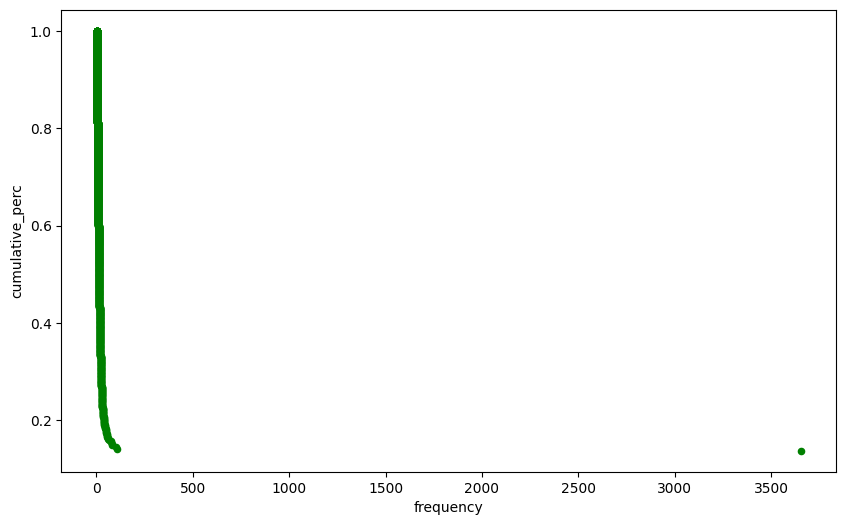

In [197]:
categorizada('first_review')[0].plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

     last_review  frequency  percentage  cumulative_perc
0      Sin fecha       3656    0.137537         0.137537
1     2024-09-22       1081    0.040667         0.178203
2     2024-09-16       1068    0.040178         0.218381
3     2024-09-23        898    0.033782         0.252163
4     2024-09-17        711    0.026747         0.278911
...          ...        ...         ...              ...
1630  2019-04-24          1    0.000038         0.999850
1631  2021-08-09          1    0.000038         0.999887
1632  2019-10-02          1    0.000038         0.999925
1633  2018-07-15          1    0.000038         0.999962
1634  2023-11-14          1    0.000038         1.000000

[1635 rows x 4 columns]
     last_review  frequency
0      Sin fecha       3656
1     2024-09-22       1081
2     2024-09-16       1068
3     2024-09-23        898
4     2024-09-17        711
...          ...        ...
1630  2019-04-24          1
1631  2021-08-09          1
1632  2019-10-02          1
1633  2018-

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

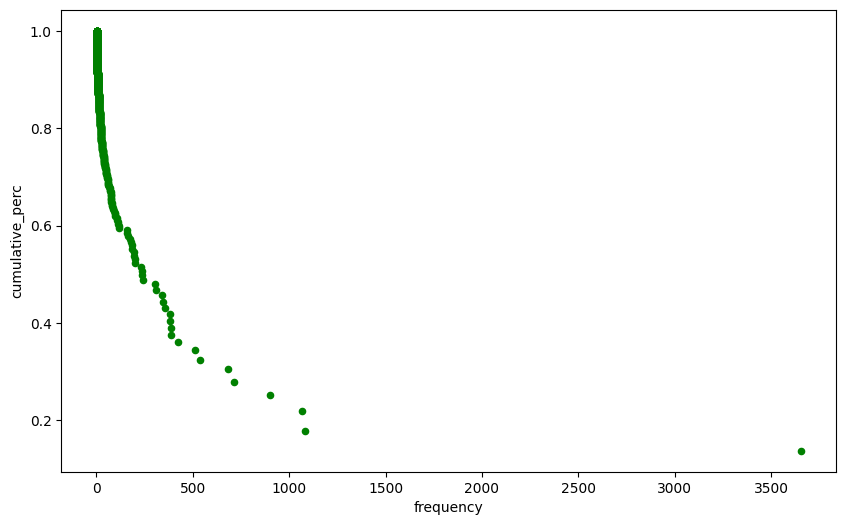

In [198]:
categorizada('last_review')[0].plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

                                   neighborhood_overview  frequency  \
0                                        Sin descripción      10895   
1      Cuauhtémoc is located just west of the city ce...         98   
2      High-end, urbane Polanco is one of the most so...         67   
3      Located just south of trendy Roma Norte, famil...         60   
4      You will find yourself in one of the best area...         47   
...                                                  ...        ...   
11540       Safe fractionation with 24-hour surveillance          1   
11541  A block away is a park, several malls, cafes, ...          1   
11542  Its located in a typical neighborhood in Mexic...          1   
11543                            15 mins from this faith          1   
11544  Welcome to Lomas de Bezares, a neighborhood kn...          1   

       percentage  cumulative_perc  
0        0.409864         0.409864  
1        0.003687         0.413551  
2        0.002521         0.416071  

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

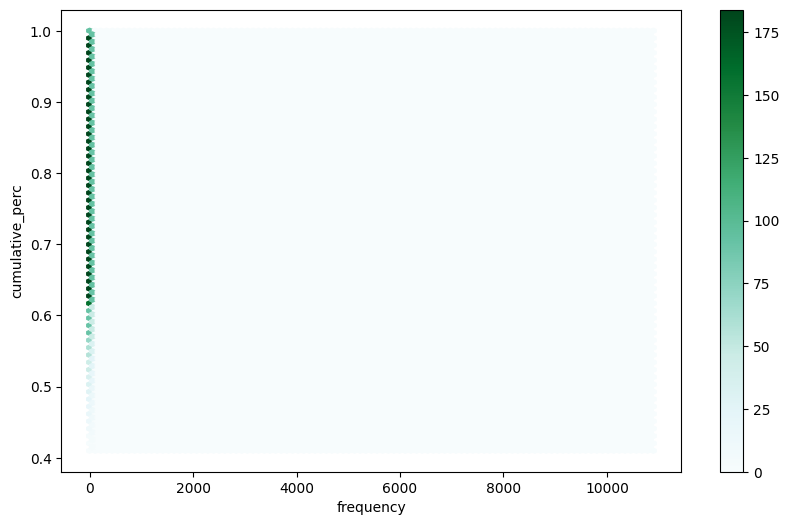

In [199]:
categorizada('neighborhood_overview')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

       host_name  frequency  percentage  cumulative_perc
0      Alejandra        341    0.012828         0.012828
1      Alejandro        293    0.011022         0.023851
2           Luis        292    0.010985         0.034836
3        Virtual        287    0.010797         0.045632
4     Blueground        258    0.009706         0.055338
...          ...        ...         ...              ...
4093   Ana Noemy          1    0.000038         0.999850
4094        Elié          1    0.000038         0.999887
4095         Cle          1    0.000038         0.999925
4096         Aby          1    0.000038         0.999962
4097       Yenny          1    0.000038         1.000000

[4098 rows x 4 columns]
       host_name  frequency
0      Alejandra        341
1      Alejandro        293
2           Luis        292
3        Virtual        287
4     Blueground        258
...          ...        ...
4093   Ana Noemy          1
4094        Elié          1
4095         Cle          1
4096       

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

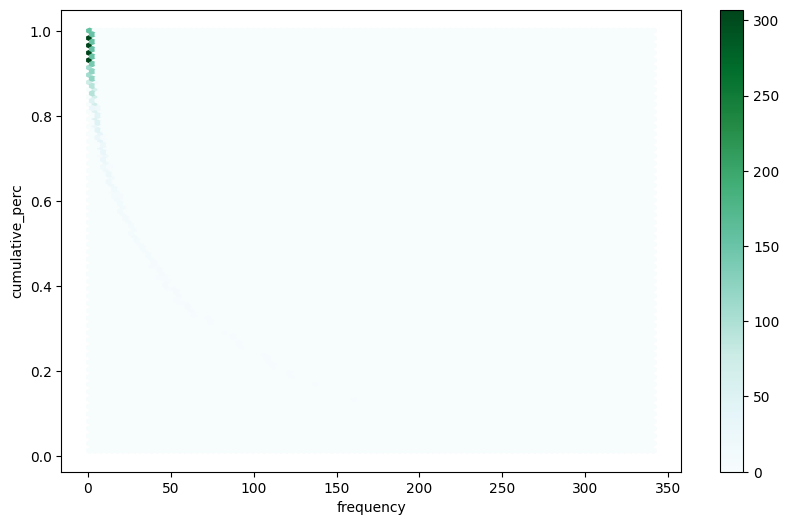

In [200]:
categorizada('host_name')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

                                               amenities  frequency  \
0      ["Iron", "Elevator", "High chair", "Wifi", "Re...         71   
1      ["Iron", "High chair", "Wifi", "Refrigerator",...         41   
2                                                     []         40   
3      ["Iron", "Wifi", "Heating", "Self check-in", "...         29   
4      ["Iron", "Elevator", "High chair", "Wifi", "Re...         25   
...                                                  ...        ...   
24693  ["Host greets you", "Kitchen", "Refrigerator",...          1   
24694  ["Iron", "Washer", "Private patio or balcony",...          1   
24695  ["Iron", "Private patio or balcony", "Heating"...          1   
24696  ["Shared patio or balcony", "Wifi", "Freezer",...          1   
24697  ["Free parking on premises", "Washer", "TV", "...          1   

       percentage  cumulative_perc  
0        0.002671         0.002671  
1        0.001542         0.004213  
2        0.001505         0.005718  

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

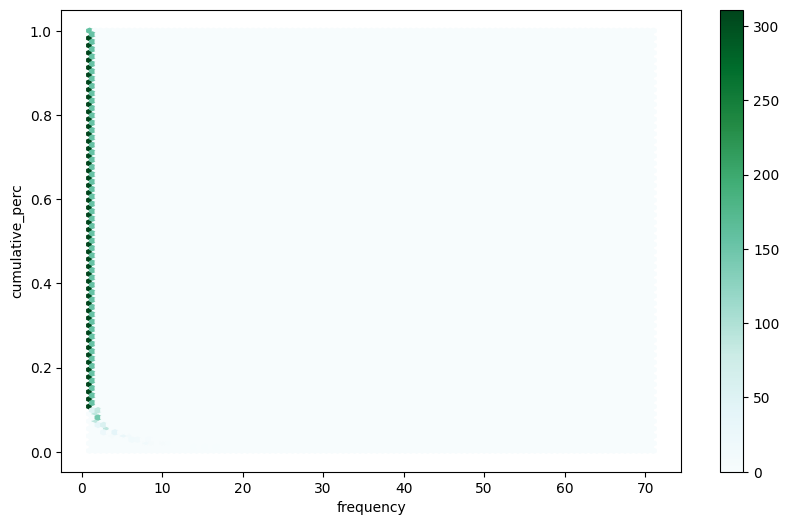

In [201]:
categorizada('amenities')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                        Perfecto Loft en gran ubicación         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                                       Magenta by Kukun         21   
...                                                  ...        ...   
25165      Astonishing view@Condesa best nbh perfect apt          1   
25166  Private suite in Condesa Great internet & loca...          1   
25167          Artsy habitación frente al Parque México!          1   
25168  LOFT 14 (Parque Delta, Hosp. siglo XXI, Foro Sol)          1   
25169                   Pretty, well centered, amenities          1   

       percentage  cumulative_perc  
0        0.002144         0.002144  
1        0.001843         0.003988  
2        0.001806         0.005793  

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

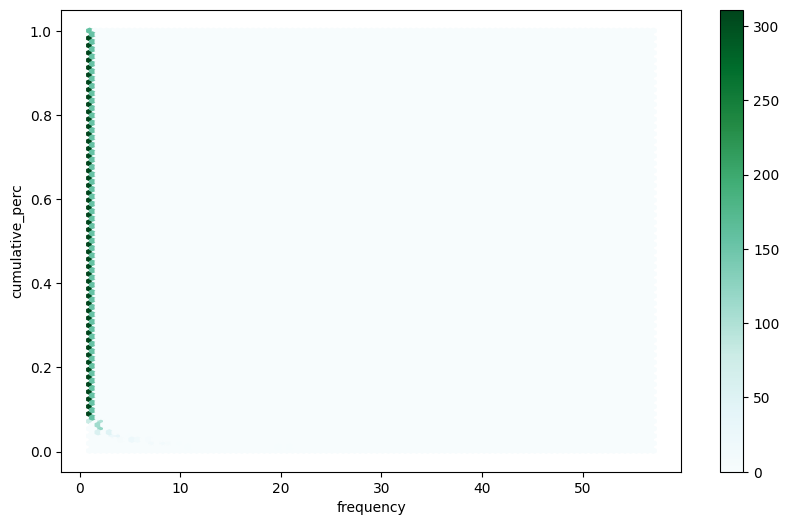

In [202]:
categorizada('name')[0].plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

# Categorización de variables

In [203]:
columns = [
    'host_total_listings_count', 'accommodates', 'beds', 'maximum_nights',
    'availability_365', 'number_of_reviews', 'review_scores_location',
    'review_scores_value', 'review_scores_rating', 'review_scores_communication',
    'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy'
]

for i in columns:
  categorizacion(str(i), 45533)

In [204]:
# Obtengo un analisis univariado de una variable categoria en especifico

table1_1 = fp.freq_tbl(df['host_response_rate'])
table2_1 = fp.freq_tbl(df['host_acceptance_rate'])
table3_1 = fp.freq_tbl(df['host_total_listings_count'])
table4_1 = fp.freq_tbl(df['accommodates'])
table5_1 = fp.freq_tbl(df['bathrooms_text'])
table6_1 = fp.freq_tbl(df['beds'])
table7_1 = fp.freq_tbl(df['price'])
table8_1 = fp.freq_tbl(df['maximum_nights']) #maximum_nights_avg_ntm
table9_1 = fp.freq_tbl(df['availability_365'])
table10_1 = fp.freq_tbl(df['number_of_reviews'])
table11_1 = fp.freq_tbl(df['review_scores_location'])
table12_1 = fp.freq_tbl(df['review_scores_value'])
table13_1 = fp.freq_tbl(df['review_scores_rating']) #reviews_per_month
table14_1 = fp.freq_tbl(df['review_scores_communication'])
table15_1 = fp.freq_tbl(df['review_scores_checkin'])
table16_1 = fp.freq_tbl(df['review_scores_cleanliness'])
table17_1 = fp.freq_tbl(df['review_scores_accuracy'])

In [205]:
# elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table1_2 = table1_1.drop(['percentage', 'cumulative_perc'], axis=1)
table2_2 = table2_1.drop(['percentage', 'cumulative_perc'], axis=1)
table3_2 = table3_1.drop(['percentage', 'cumulative_perc'], axis=1)
table4_2 = table4_1.drop(['percentage', 'cumulative_perc'], axis=1)
table5_2 = table5_1.drop(['percentage', 'cumulative_perc'], axis=1)
table6_2 = table6_1.drop(['percentage', 'cumulative_perc'], axis=1)
table7_2 = table7_1.drop(['percentage', 'cumulative_perc'], axis=1)
table8_2 = table8_1.drop(['percentage', 'cumulative_perc'], axis=1)
table9_2 = table9_1.drop(['percentage', 'cumulative_perc'], axis=1)
table10_2 = table10_1.drop(['percentage', 'cumulative_perc'], axis=1)
table11_2 = table11_1.drop(['percentage', 'cumulative_perc'], axis=1)
table12_2 = table12_1.drop(['percentage', 'cumulative_perc'], axis=1)
table13_2 = table13_1.drop(['percentage', 'cumulative_perc'], axis=1)
table14_2 = table14_1.drop(['percentage', 'cumulative_perc'], axis=1)
table15_2 = table15_1.drop(['percentage', 'cumulative_perc'], axis=1)
table16_2 = table16_1.drop(['percentage', 'cumulative_perc'], axis=1)
table17_2 = table17_1.drop(['percentage', 'cumulative_perc'], axis=1)

In [206]:
# obtengo un fitlro de los valores
Filtro1 = table1_2[table1_2['frequency'] > 1]
Filtro2 = table2_2[table2_2['frequency'] > 1]
Filtro3 = table3_2[table3_2['frequency'] > 1]
Filtro4 = table4_2[table4_2['frequency'] > 1]
Filtro5 = table5_2[table5_2['frequency'] > 1]
Filtro6 = table6_2[table6_2['frequency'] > 1]
Filtro7 = table7_2[table7_2['frequency'] > 1]
Filtro8 = table8_2[table8_2['frequency'] > 1]
Filtro9 = table9_2[table9_2['frequency'] > 1]
Filtro10 = table10_2[table10_2['frequency'] > 1]
Filtro11 = table11_2[table11_2['frequency'] > 1]
Filtro12 = table12_2[table12_2['frequency'] > 1]
Filtro13 = table13_2[table13_2['frequency'] > 1]
Filtro14 = table14_2[table14_2['frequency'] > 1]
Filtro15 = table15_2[table15_2['frequency'] > 1]
Filtro16 = table16_2[table16_2['frequency'] > 1]
Filtro17 = table17_2[table17_2['frequency'] > 1]

In [207]:
# ajusto  el indice de mi data frame
Filtro_index1 = Filtro1.set_index('host_response_rate')
Filtro_index2 = Filtro2.set_index('host_acceptance_rate')
Filtro_index3 = Filtro3.set_index('host_total_listings_count')
Filtro_index4 = Filtro4.set_index('accommodates')
Filtro_index5 = Filtro5.set_index('bathrooms_text')
Filtro_index6 = Filtro6.set_index('beds')
Filtro_index7 = Filtro7.set_index('price')
Filtro_index8 = Filtro8.set_index('maximum_nights')
Filtro_index9 = Filtro9.set_index('availability_365')
Filtro_index10 = Filtro10.set_index('number_of_reviews')
Filtro_index11 = Filtro11.set_index('review_scores_location')
Filtro_index12 = Filtro12.set_index('review_scores_value')
Filtro_index13 = Filtro13.set_index('review_scores_rating')
Filtro_index14 = Filtro14.set_index('review_scores_communication')
Filtro_index15 = Filtro15.set_index('review_scores_checkin')
Filtro_index16 = Filtro16.set_index('review_scores_cleanliness')
Filtro_index17 = Filtro17.set_index('review_scores_accuracy')

# Graficos de Barra

Text(0.5, 0, 'Herramientas')

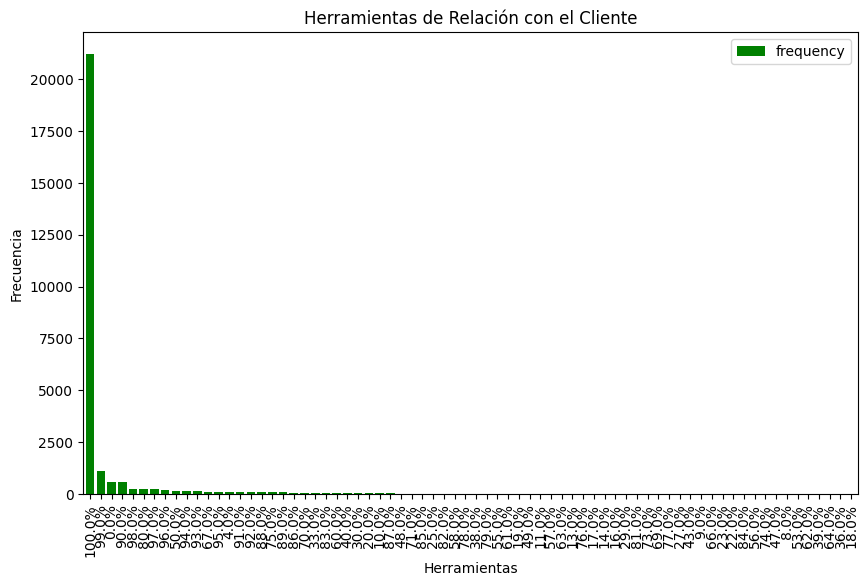

In [208]:
Filtro_index1.plot(kind='bar', width=0.8, color='green', figsize=(10,6))
plt.title('Herramientas de Relación con el Cliente')
plt.ylabel('Frecuencia')
plt.xlabel('Herramientas')

Text(0.5, 0, 'Herramientas')

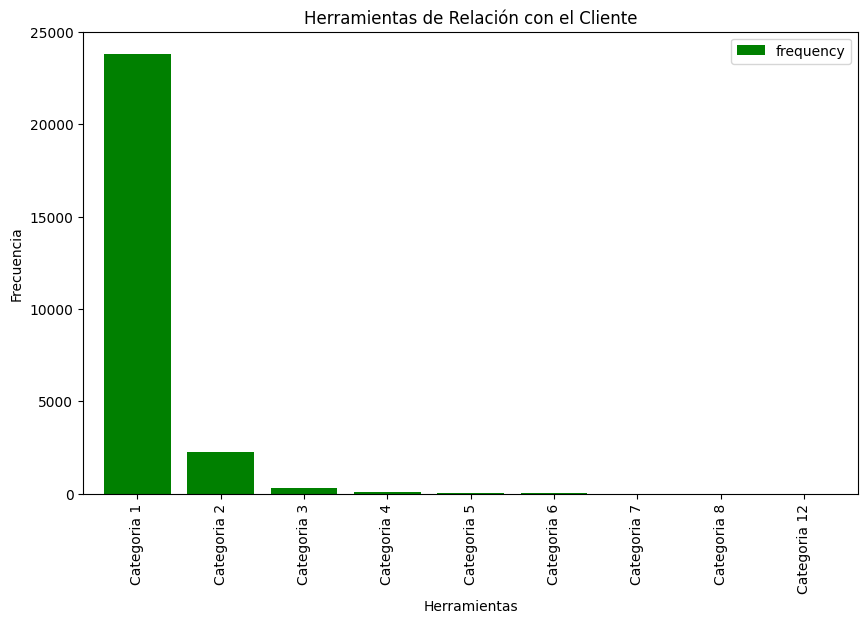

In [209]:
Filtro_index6.plot(kind='bar', width=0.8, color='green', figsize=(10,6))
plt.title('Herramientas de Relación con el Cliente')
plt.ylabel('Frecuencia')
plt.xlabel('Herramientas')

Text(0.5, 0, 'Herramientas')

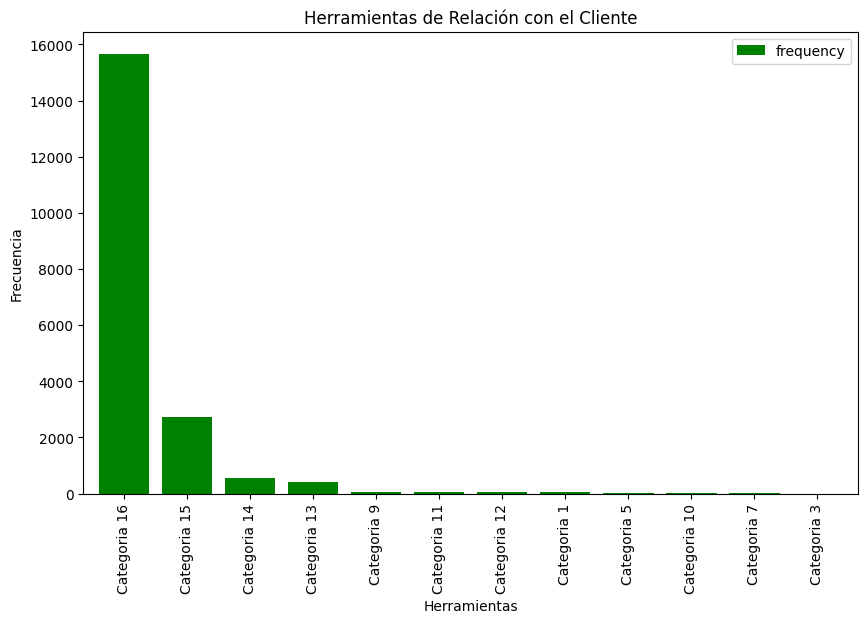

In [210]:
Filtro_index11.plot(kind='bar', width=0.8, color='green', figsize=(10,6))
plt.title('Herramientas de Relación con el Cliente')
plt.ylabel('Frecuencia')
plt.xlabel('Herramientas')

Text(0.5, 0, 'Herramientas')

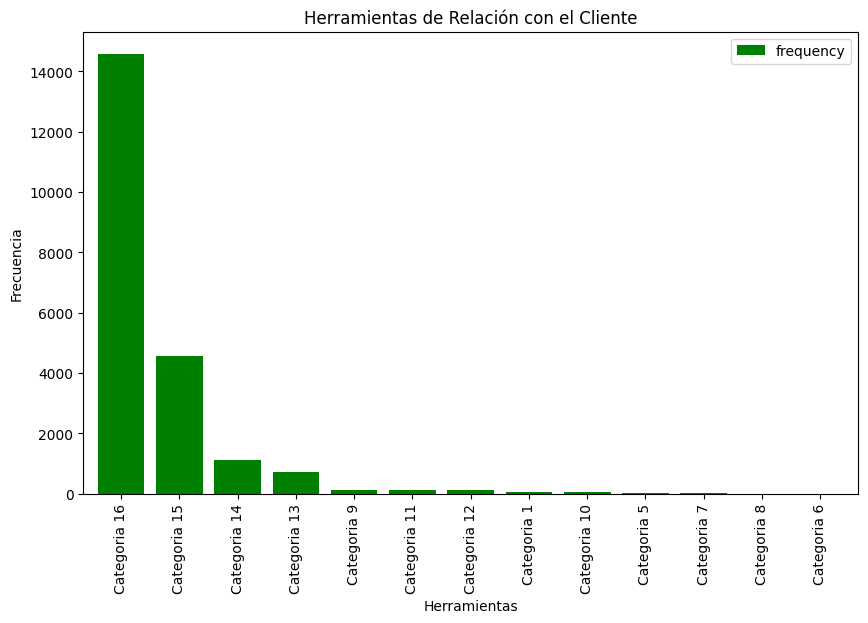

In [211]:
Filtro_index16.plot(kind='bar', width=0.8, color='green', figsize=(10,6))
plt.title('Herramientas de Relación con el Cliente')
plt.ylabel('Frecuencia')
plt.xlabel('Herramientas')

In [212]:
# Filtro_index.plot(kind='bar', width=0.8, color='green', figsize=(10,6))
# plt.title('Herramientas de Relación con el Cliente')
# plt.ylabel('Frecuencia')
# plt.xlabel('Herramientas')

# Graficos de Disperción

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

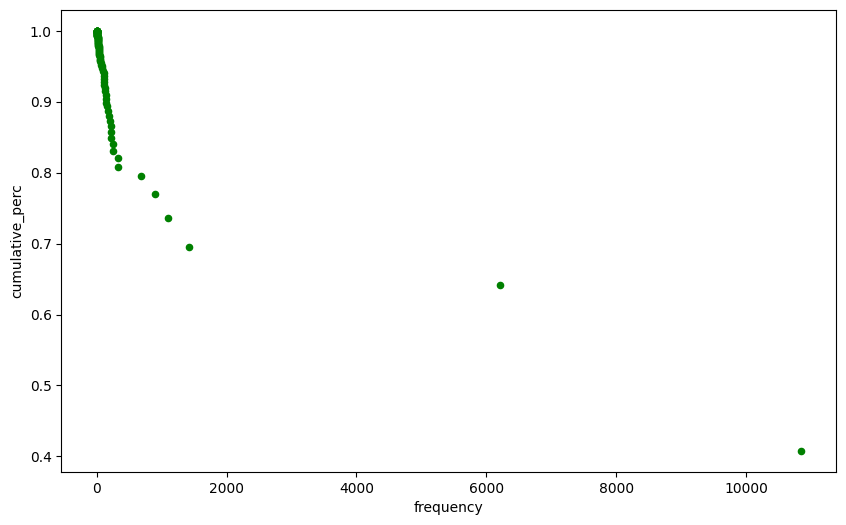

In [213]:
table2_1.plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

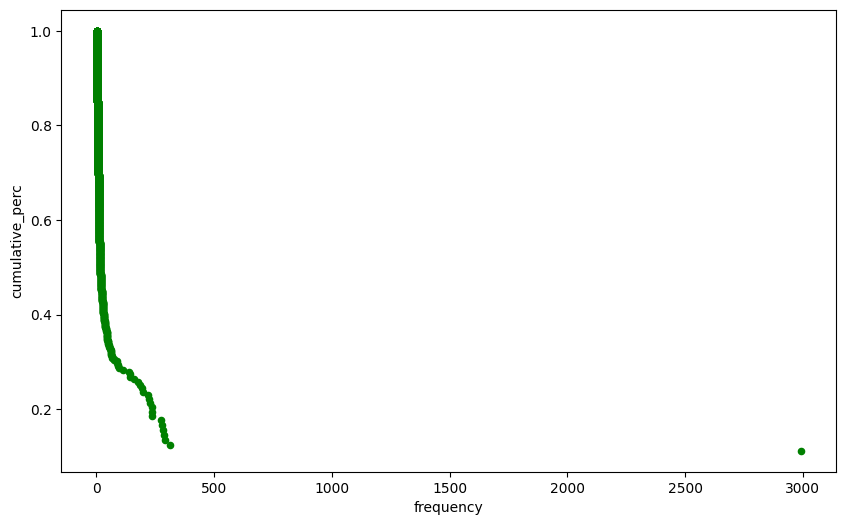

In [214]:
table7_1.plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

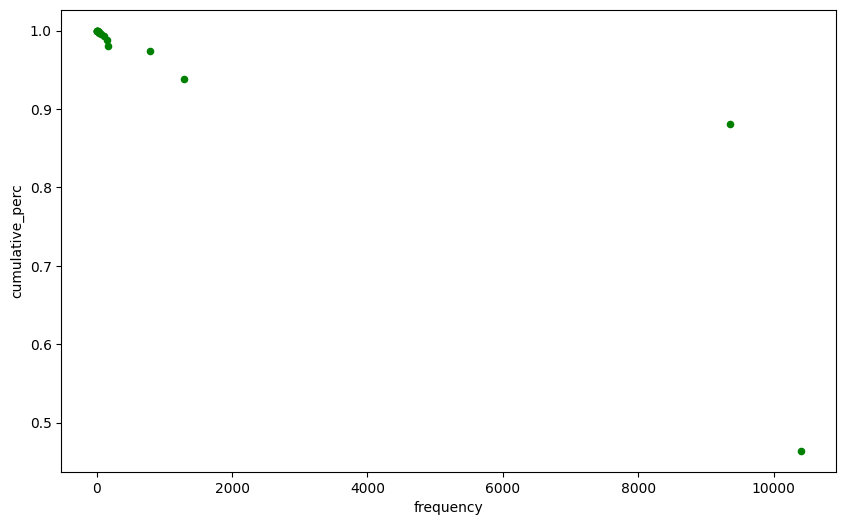

In [215]:
table12_1.plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

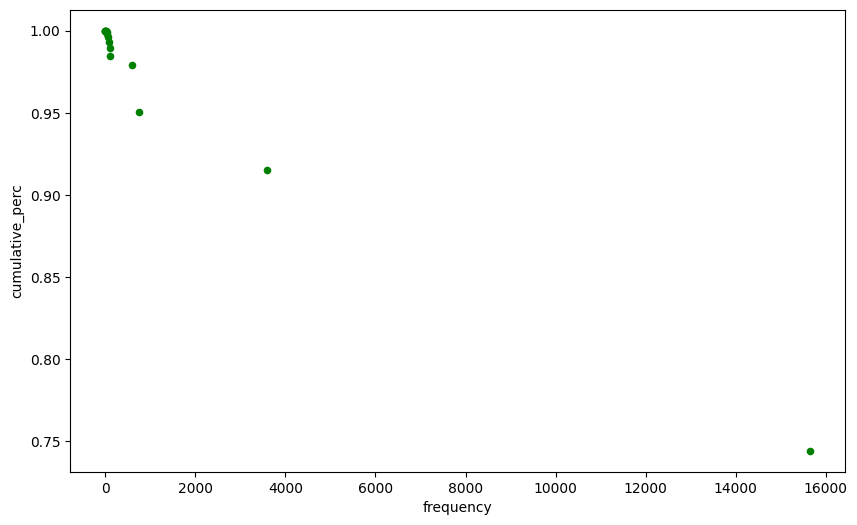

In [216]:
table17_1.plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

In [217]:
# table1.plot('frequency', 'cumulative_perc', kind='scatter', color='green', figsize=(10,6))

# Graficos de Area

<Axes: xlabel='host_total_listings_count'>

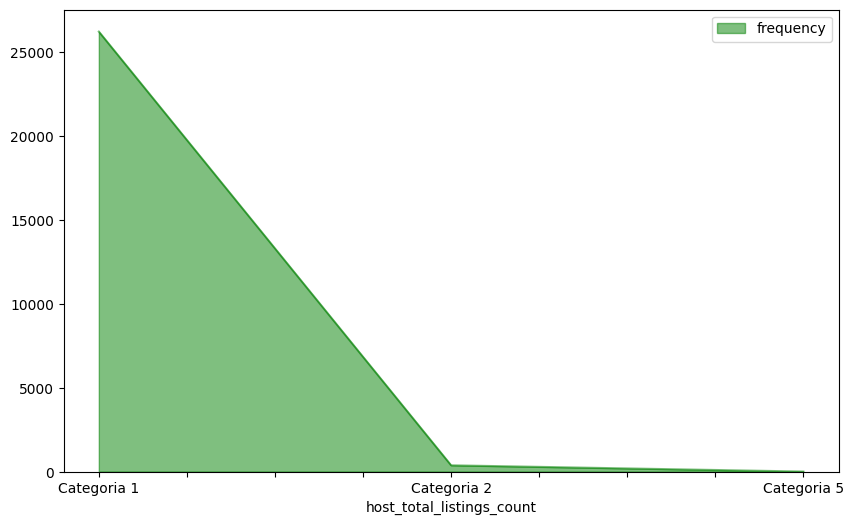

In [218]:
Filtro_index3.plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

<Axes: xlabel='maximum_nights'>

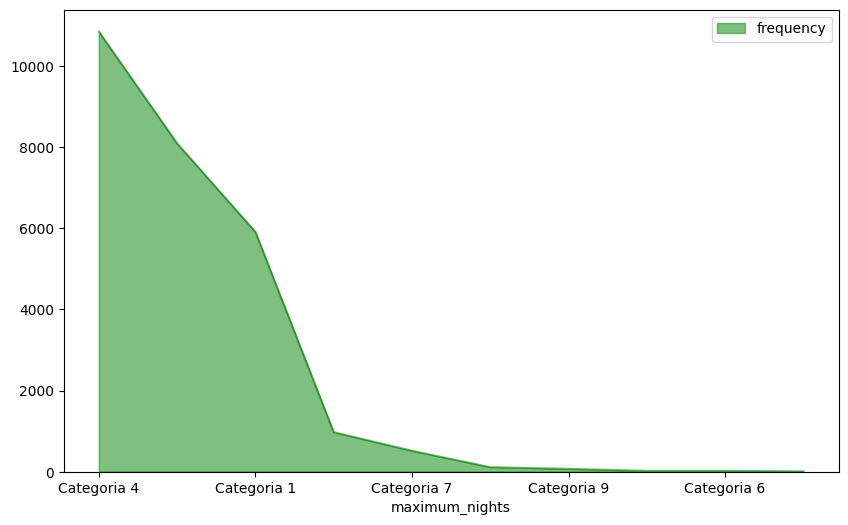

In [219]:
Filtro_index8.plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

<Axes: xlabel='review_scores_rating'>

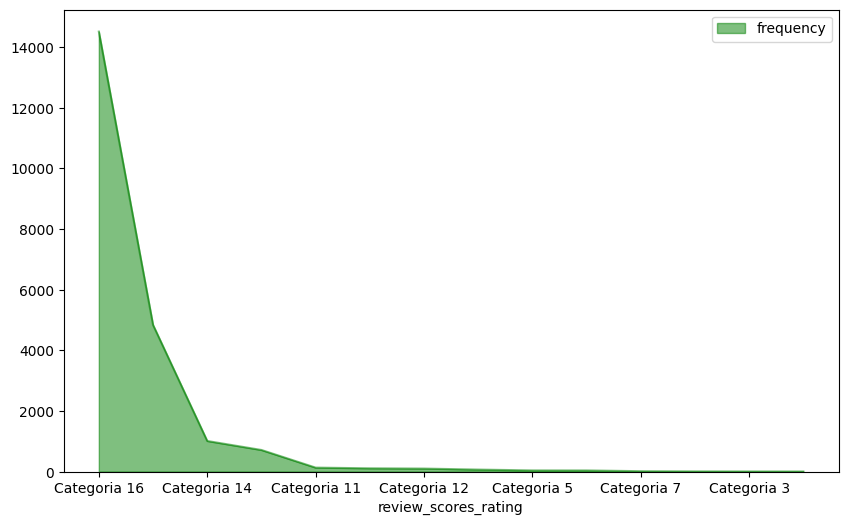

In [220]:
Filtro_index13.plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

In [221]:
# Filtro_index.plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

In [222]:
# Filtro_index.plot(kind='area', color='green', figsize=(10,6), alpha=0.5)

# Graficos de Pastel

<Axes: ylabel='frequency'>

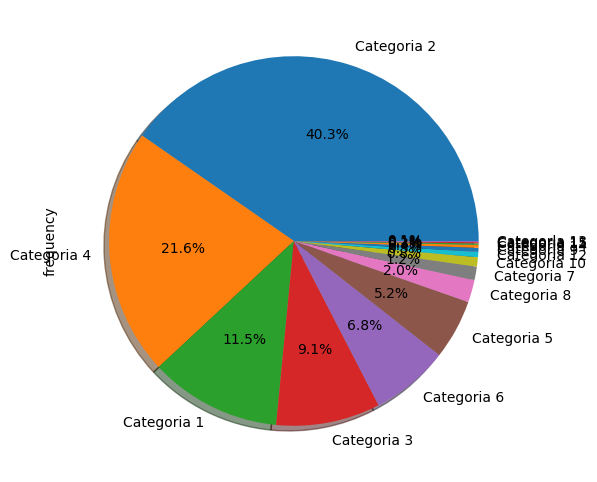

In [223]:
Filtro_index4['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

<Axes: ylabel='frequency'>

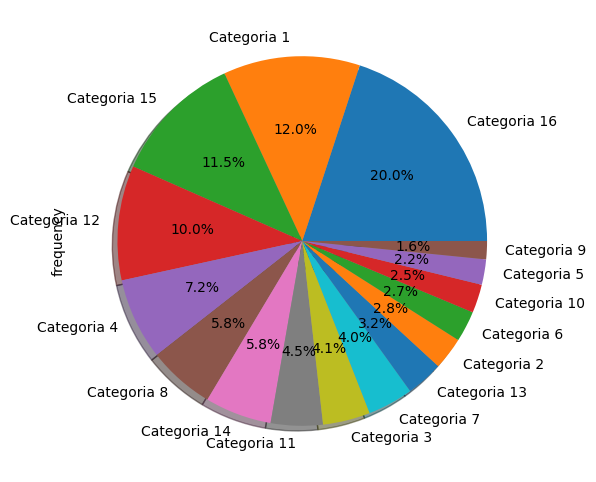

In [224]:
Filtro_index9['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

<Axes: ylabel='frequency'>

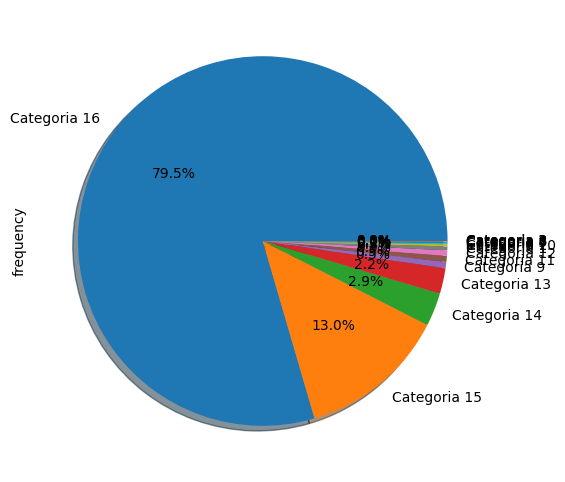

In [225]:
Filtro_index14['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

In [226]:
# Filtro_index['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

In [227]:
# Filtro_index['frequency'].plot(kind='pie', figsize=(10,6), shadow=True, autopct='%0.1f%%')

# Graficos Hexagonales

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

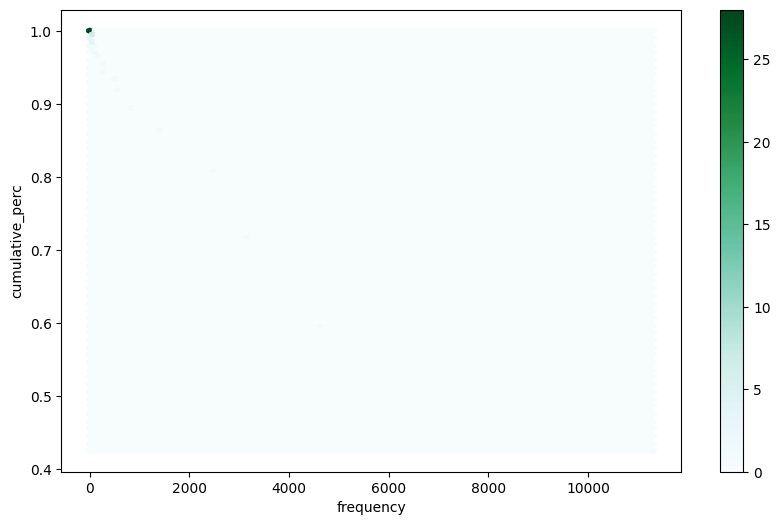

In [228]:
table5_1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

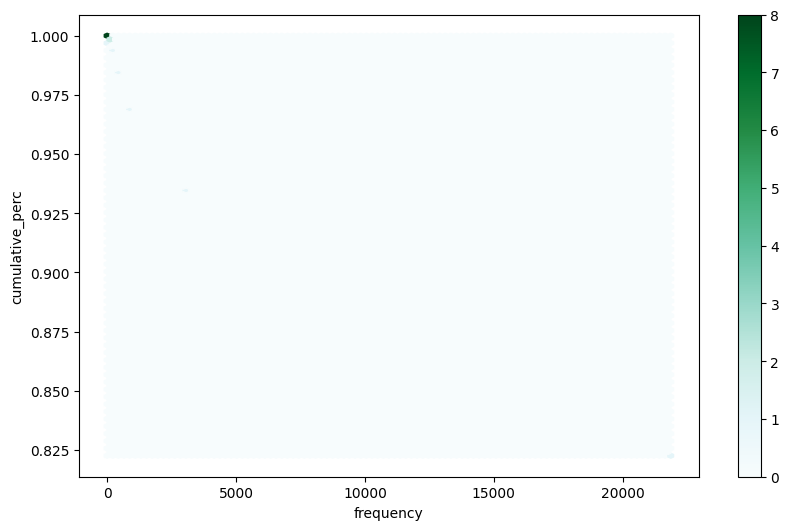

In [229]:
table10_1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

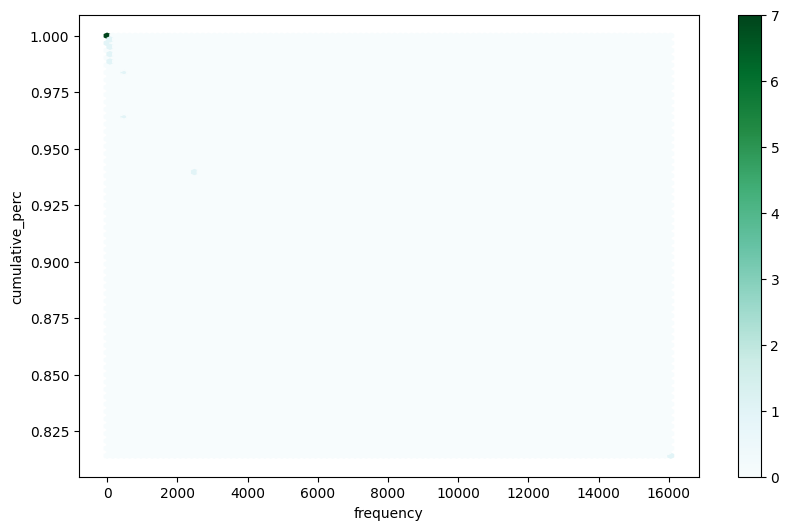

In [230]:
table15_1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

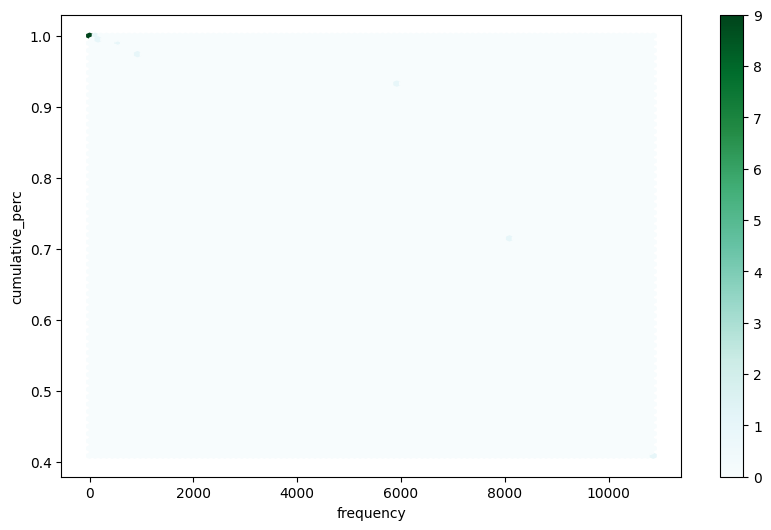

In [231]:
table8_1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))

In [232]:
# table1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,6))